# Serval vs Cat, which is which?

This notebook is going to determine between several pictures, which one of those pictures is an ordinary house cat, and which one of those is a serval.

Some immediate ways to determine:
Servals have very similar facial features as cats
Servals are a bit longer
Servals always have a spotted pattern
Servals have a nubbed tail
Servals are typically found outdoors

Cats come in a wide variety
Cats can be small or big depending on the breed
Cats can typically be found in human environments


## Start Coding

Let's start with our import of TensorFlow

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.3.0


We will train a neural network to recognize servals from a common dataset found

[here](https://github.com/zalandoresearch/fashion-mnist).

(Description of databases goes here).

![alt text](https://i.ytimg.com/vi/oCNpnCUHaWo/maxresdefault.jpg)

Loading images

We will open the loaded database from the directory path to the zipfile in the databases folder

*above currently not true, please correct the database to display coyotes instead of roses

In [2]:
import pathlib
data_dir = "/content/databases"
data_dir = pathlib.Path(data_dir)

Checking to see how many images are in the set
Doing this to see if the images loaded correctly

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

20


This is the database that has both the servals and the cats in it.  Here are some examples

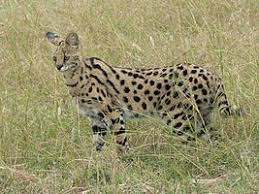

In [4]:
serval = list(data_dir.glob('serval/*'))
PIL.Image.open(str(serval[0])) 

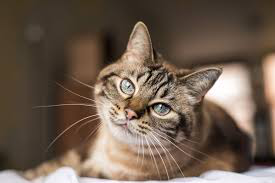

In [5]:
cat = list(data_dir.glob('cat/*'))
PIL.Image.open(str(cat[0])) 

# Creating the datasets

Let's set up parameters

In [6]:
batch_size = 10
img_height = 180
img_width = 180

Let's also take 80% of the data from the set as training and set aside 20% for validation

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20 files belonging to 2 classes.
Using 16 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20 files belonging to 2 classes.
Using 4 files for validation.


Let's also find our dataset names.

In [9]:
class_names = train_ds.class_names
print(class_names)

['cat', 'serval']


Here are the first 9 images:

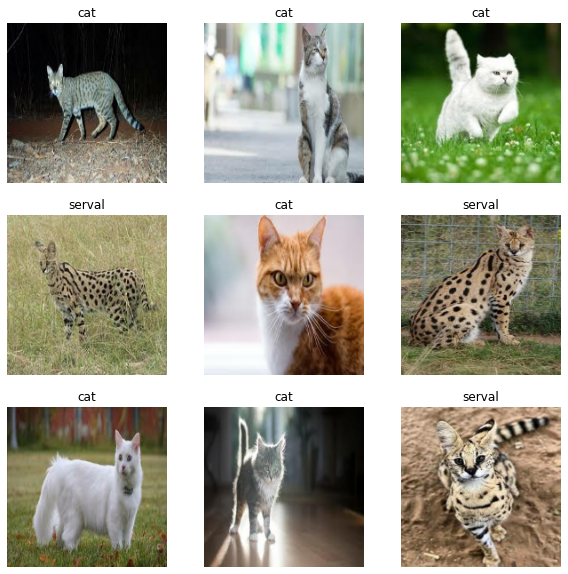

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Normalizing:

In [11]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

##Designing the model:

Compliling the model

In [12]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation=tf.nn.softmax)
])

Optimizing the model

In [13]:
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

Training model with model.fit

In [14]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
2/2 [==============================] - 0s 231ms/step - loss: 2.0568 - accuracy: 0.1875 - val_loss: 1.0268 - val_accuracy: 0.5000
Epoch 2/3
2/2 [==============================] - 0s 181ms/step - loss: 0.9204 - accuracy: 0.4375 - val_loss: 0.7067 - val_accuracy: 0.5000
Epoch 3/3
2/2 [==============================] - 0s 182ms/step - loss: 0.4465 - accuracy: 0.8125 - val_loss: 0.9404 - val_accuracy: 0.5000


# Exploration Exercises

###Exercise 1:

We will determine which of these excercises are worth running and evaluate them.  In addition, we will edit some of them to provide more unique output.


For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [15]:
# classifications = model.predict(test_images)

# print(classifications[0])

Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does? 

In [16]:
# print(test_labels[0])

### What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes



####Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the handwriting is of a '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities.

For the 7, the probability was .999+, i.e. the neural network is telling us that it's almost certainly a 7.

### How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list




####Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

##Exercise 2:
 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 



In [17]:
# import tensorflow as tf
# print(tf.__version__)

# mnist = tf.keras.datasets.fashion_mnist

# (training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# training_images = training_images/255.0
# test_images = test_images/255.0

# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(1024, activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy')

# model.fit(training_images, training_labels, epochs=5)

# model.evaluate(test_images, test_labels)

# classifications = model.predict(test_images)

# print(classifications[0])
# print(test_labels[0])

###Question 1. Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


####Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

##Exercise 3: 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [18]:
# import tensorflow as tf
# print(tf.__version__)

# mnist = tf.keras.datasets.fashion_mnist

# (training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# training_images = training_images/255.0
# test_images = test_images/255.0


# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# # This version has the 'flatten' removed. Replace the above with this one to see the error.
# #model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
# #                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy')

# model.fit(training_images, training_labels, epochs=5)

# model.evaluate(test_images, test_labels)

# classifications = model.predict(test_images)

# print(classifications[0])
# print(test_labels[0])

##Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [19]:
# import tensorflow as tf
# print(tf.__version__)

# mnist = tf.keras.datasets.fashion_mnist

# (training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# training_images = training_images/255.0
# test_images = test_images/255.0

# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# # Replace the above model definiton with this one to see the network with 5 output layers
# # And you'll see errors as a result!
# # model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
# #                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
# #                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy')

# model.fit(training_images, training_labels, epochs=5)

# model.evaluate(test_images, test_labels)

# classifications = model.predict(test_images)

# print(classifications[0])
# print(test_labels[0])

##Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

In [20]:
# import tensorflow as tf
# print(tf.__version__)

# mnist = tf.keras.datasets.fashion_mnist

# (training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# training_images = training_images/255.0
# test_images = test_images/255.0

# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(512, activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(256, activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy')

# model.fit(training_images, training_labels, epochs=5)

# model.evaluate(test_images, test_labels)

# classifications = model.predict(test_images)

# print(classifications[0])
# print(test_labels[0])

#Exercise 6: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [21]:
# import tensorflow as tf
# print(tf.__version__)

# mnist = tf.keras.datasets.fashion_mnist

# (training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# training_images = training_images/255.0
# test_images = test_images/255.0

# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy')

# model.fit(training_images, training_labels, epochs=30)

# model.evaluate(test_images, test_labels)

# classifications = model.predict(test_images)

# print(classifications[34])
# print(test_labels[34])

#Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [22]:
# import tensorflow as tf
# print(tf.__version__)
# mnist = tf.keras.datasets.fashion_mnist
# (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# # To experiment with removing normalization, comment out the following 2 lines
# training_images=training_images/255.0
# test_images=test_images/255.0
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
# model.fit(training_images, training_labels, epochs=5)
# model.evaluate(test_images, test_labels)
# classifications = model.predict(test_images)
# print(classifications[0])
# print(test_labels[0])

#Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [23]:
# import tensorflow as tf
# print(tf.__version__)

# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('acc')>0.9):
#       print("\nReached 90% accuracy so cancelling training!")
#       self.model.stop_training = True

# callbacks = myCallback()
# mnist = tf.keras.datasets.fashion_mnist
# (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images=training_images/255.0
# test_images=test_images/255.0
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


